# Prediction of employees/people leaving the organization post receiving the necessary training 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install imblearn
from imblearn.over_sampling import SMOTE 
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [5]:
df.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [8]:
df.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [9]:
df.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

## checking for duplicat values

In [10]:
df.duplicated().any()


False

There is no duplicate value in the dataset

## checking for Null values

In [11]:
missing_values= df.isnull().sum()
missing_values[missing_values>0]

gender                 4508
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
dtype: int64

lot of null values present in the dataset.we need treat them before building the model.

## Exploratory Data Analysis

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

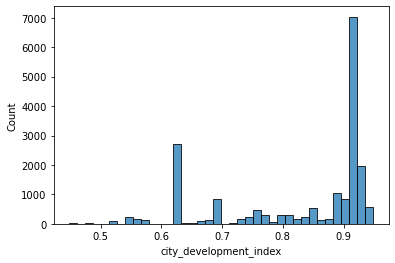

In [12]:
sns.histplot(df['city_development_index'])

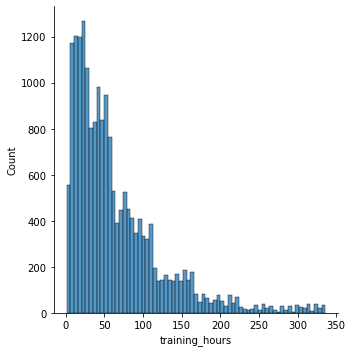

In [13]:
sns.displot(df['training_hours'])

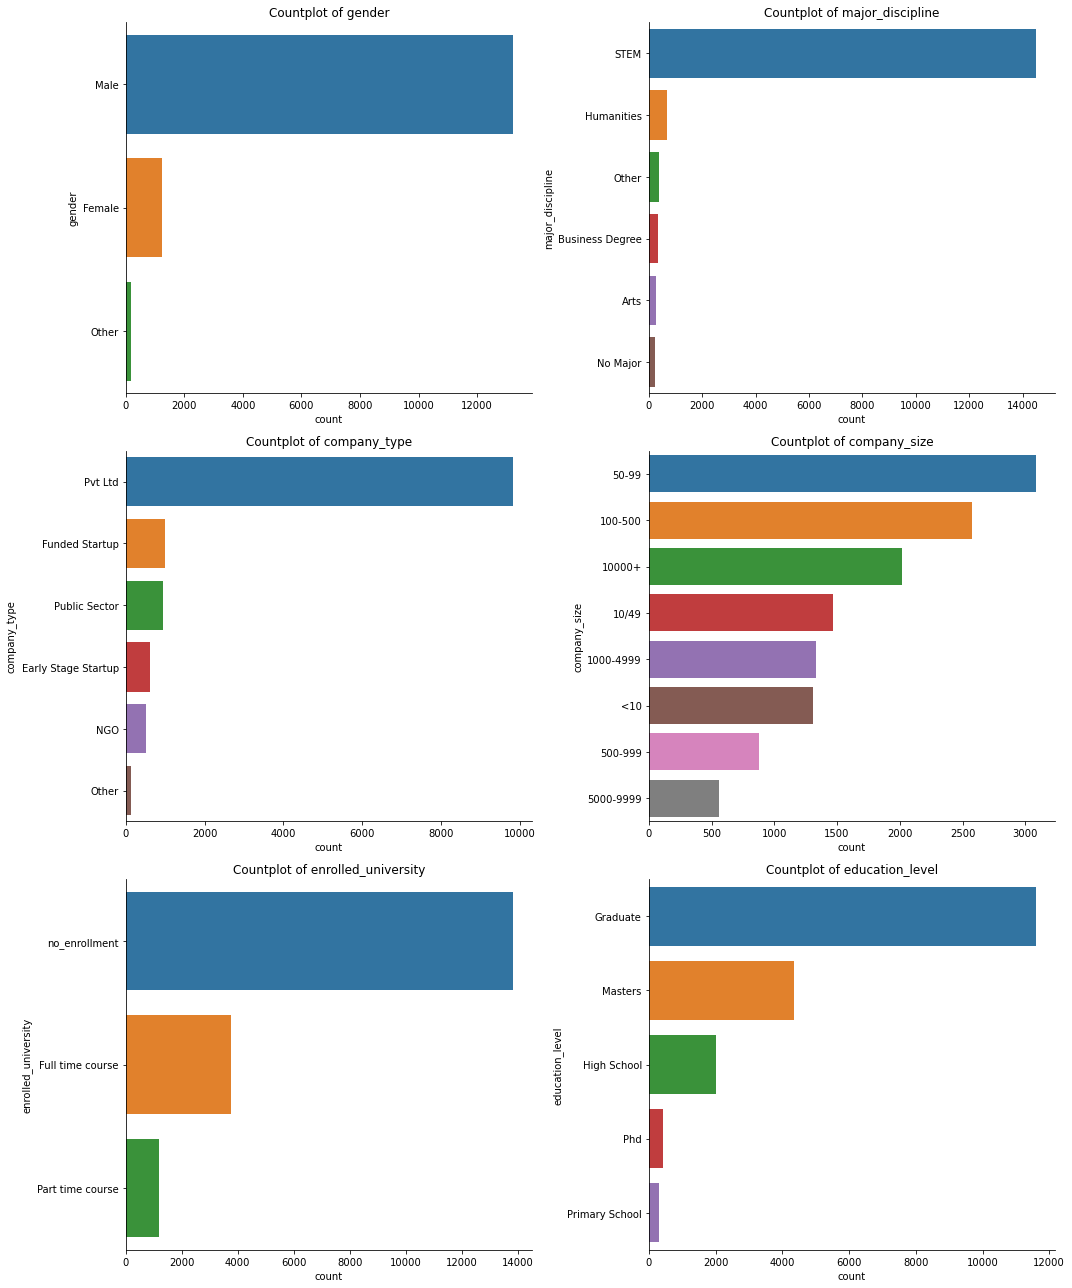

In [14]:
plt.figure(figsize=[15,18])

features=['gender','major_discipline','company_type','company_size','enrolled_university','education_level']
n=1

for f in features:
    plt.subplot(3,2,n)
    order=df[f].value_counts().index
    sns.countplot(y=df[f],order=order);
    sns.despine()
    plt.title("Countplot of {}".format(f))
    n=n+1
plt.tight_layout()


Majorly categorical features have one value in excess compared to other values therefore imputation by most frequent would be suitable for null values.

visualize the target column.

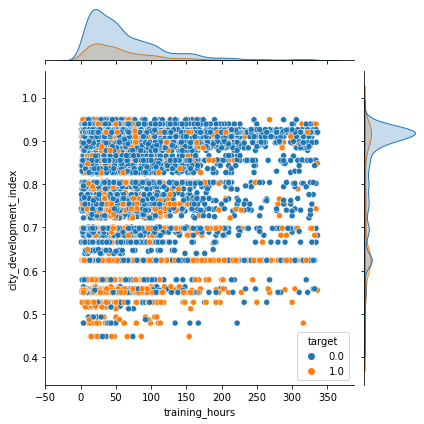

In [15]:
sns.jointplot(x='training_hours',y='city_development_index',data=df,hue='target')

People hailing from cities having low city development index tend to switch more than people from cities having high development index.

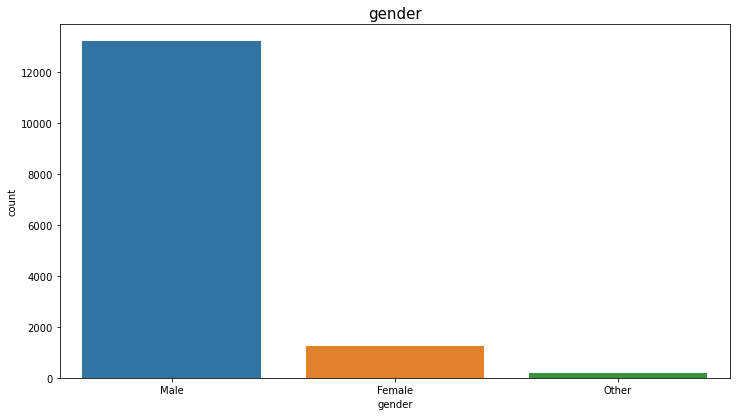

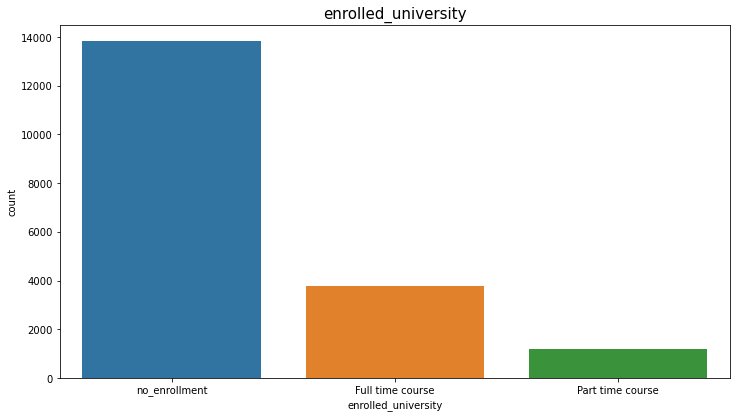

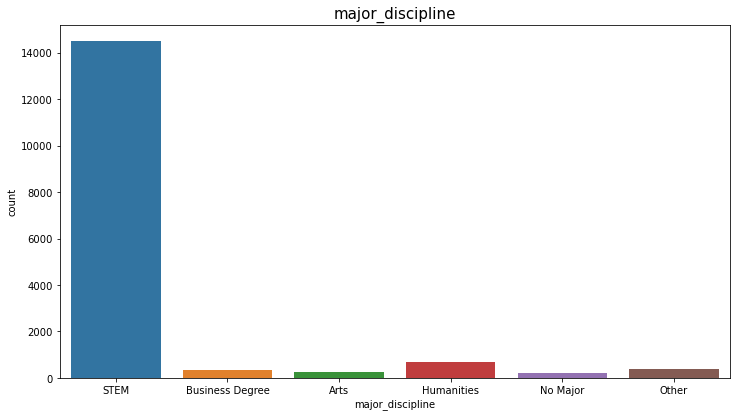

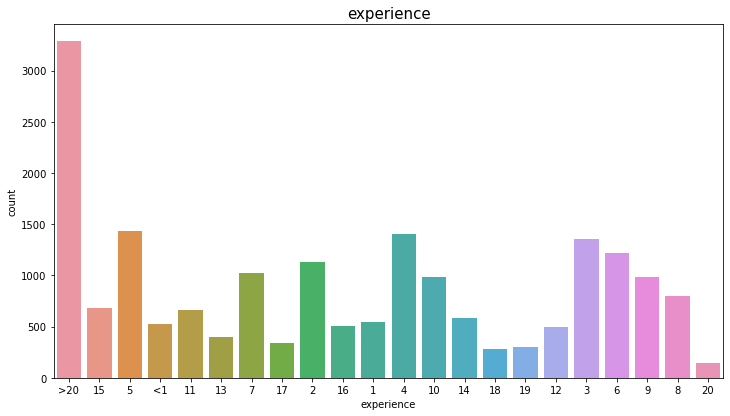

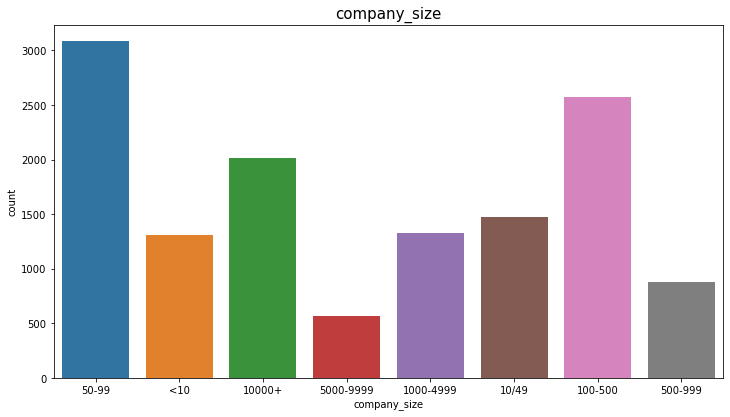

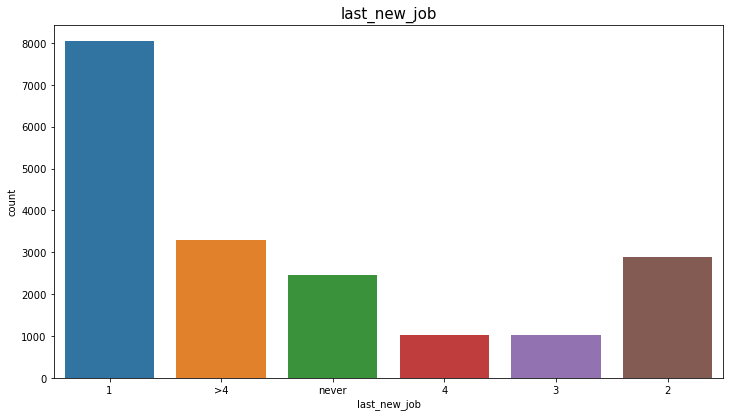

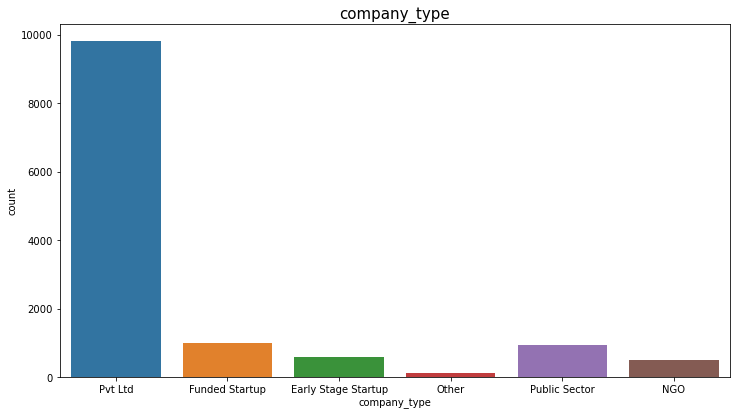

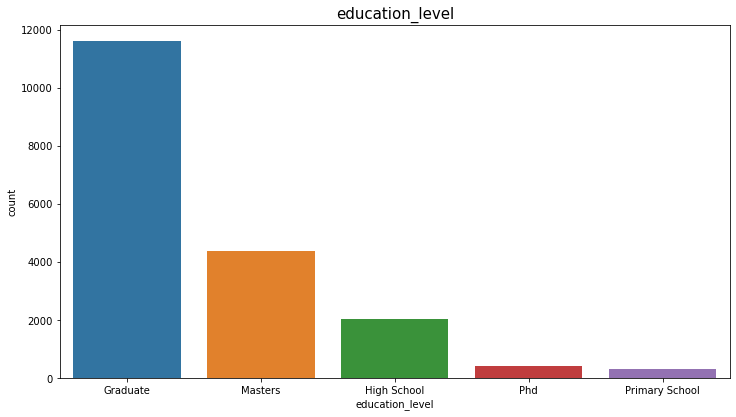

In [16]:
cols_with_nan_data = df[['gender', 'enrolled_university', 'major_discipline', 'experience', 'company_size', 'last_new_job', 'company_type', 'education_level']]   


for i in cols_with_nan_data:
    plt.figure(figsize=(12,6.5)) 
    plt.title(i, fontsize=15)
    sns.countplot(data = df[i], x = cols_with_nan_data[i])
    plt.show()

Majorly categorical features have one value in excess compared to other values therefore imputation by most frequent would be suitable for null values.

visualize the target column

<AxesSubplot:xlabel='target', ylabel='count'>

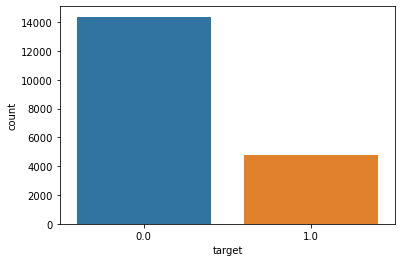

In [17]:
sns.countplot(df['target'],data=df)

here  we can clearly see that our target highly unbalanced.so, it needs to be balanced in order to be able to implement ML with fair results. 

## calculating the percentage of NAN per column

In [18]:
df.isnull().sum()/len(df)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

## Treating the null values

In [19]:
print(df['gender'].mode())

0    Male
Name: gender, dtype: object


In [20]:
df['gender'].fillna(value='Male',inplace=True)

In [21]:
#Filling enrolled_university column
df['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: object

In [22]:
df['enrolled_university'].fillna(value='no_enrollment',inplace=True)

In [23]:
#Filling education_level

df['education_level'].mode()

0    Graduate
Name: education_level, dtype: object

In [24]:
df['education_level'].fillna(value='Graduate',inplace=True)

In [25]:
#Filling major_discipline 

df['major_discipline'].mode()

0    STEM
Name: major_discipline, dtype: object

In [26]:
df['major_discipline'].fillna(value='STEM',inplace=True)

In [27]:
#Filling experience
df['experience'].mode()

0    >20
Name: experience, dtype: object

In [28]:
df['experience'].fillna(value='>20',inplace=True)

In [29]:
#Filling company size

df['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [30]:
df['company_size'].fillna(value='50-99',inplace=True)

In [31]:
#Filling company_type

df['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [32]:
df['company_type'].fillna(value='Pvt Ltd',inplace=True)

In [33]:
#Filling last new job

df['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [34]:
df['last_new_job'].fillna(value='1',inplace=True)

In [35]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

so,now no values are empty in the dataset

## checking for outliers

<AxesSubplot:xlabel='training_hours'>

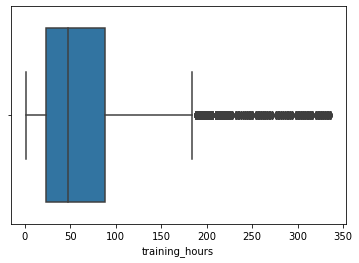

In [36]:
sns.boxplot(df['training_hours'],data=df)

In [37]:
iqr = df.training_hours.quantile(0.75) - df.training_hours.quantile(0.25)

In [38]:
UL = df.training_hours.quantile(0.75) + 1.5 *iqr
UL

185.5

In [39]:
 df1 =df[df.training_hours <UL]

In [40]:
df1.shape

(18174, 14)

In [41]:
df1.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## checking for multicolinarity

In [42]:
vcorr=df1.corr()

<AxesSubplot:>

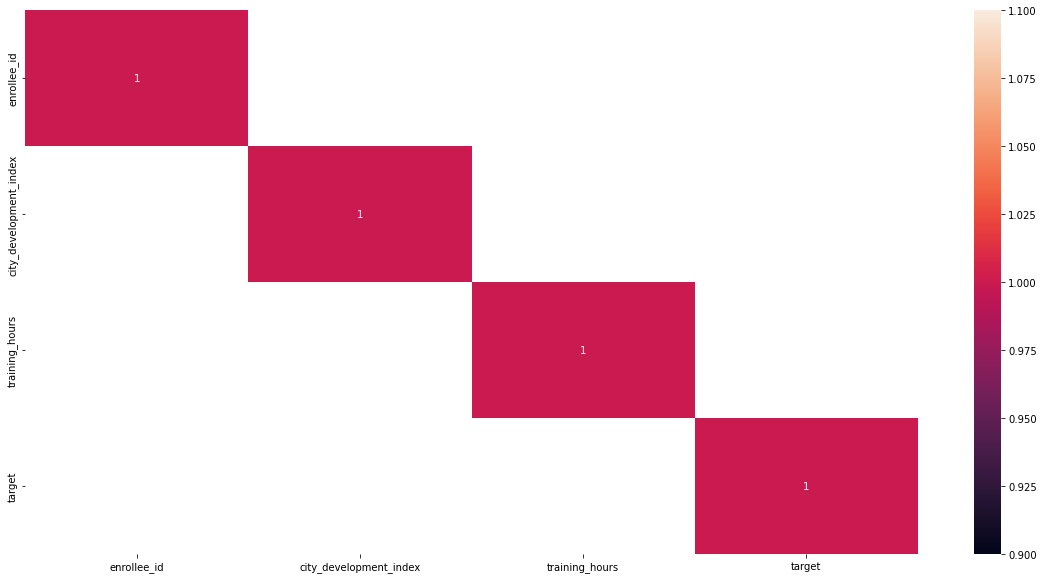

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(vcorr[(vcorr>0.80)|(vcorr <-80)],annot=True)

 from above heatmap we can see that features correlated to each other.enrollee_id,city are dont have useful information.so,we can simply drop that columns.

## Data preprocessing

In [44]:
df1.drop(['enrollee_id','city'],axis=1,inplace =True)

In [45]:
df1.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [46]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
ordinal_data =df1[['education_level', 'experience', 'company_size', 'last_new_job']]
nominal_data =df1[['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']]
for col in ordinal_data.columns:
    df1[col] =lr.fit_transform(df1[col])


In [47]:
df1  =pd.get_dummies(data=df1,columns=['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type'],
drop_first= True)

from above correlation there is no strong relationship between features.

In [48]:
df1.shape

(18174, 22)

In [49]:
df1.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,0,21,4,0,36,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0.776,0,6,4,4,47,0.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
2,0.624,0,15,4,5,83,0.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0.789,0,20,4,5,52,1.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1
4,0.767,2,21,4,3,8,0.0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0


## balancing the dataset

In [50]:
## balancing target column
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

x = df1.drop(columns=['target'] , axis=1 )
y = df1['target']


# summarize class distribution
counter = Counter(y)
print(counter)


# transform the dataset
oversample = SMOTE()
x_balanced, y_balanced = oversample.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y_balanced)
print(counter)

Counter({0.0: 13607, 1.0: 4567})
Counter({1.0: 13607, 0.0: 13607})


<AxesSubplot:xlabel='target', ylabel='count'>

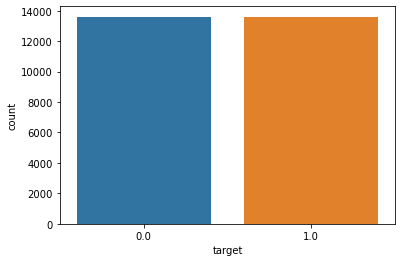

In [51]:
sns.countplot(x= y_balanced,data=df1)

our dataset is now balanced.

<AxesSubplot:>

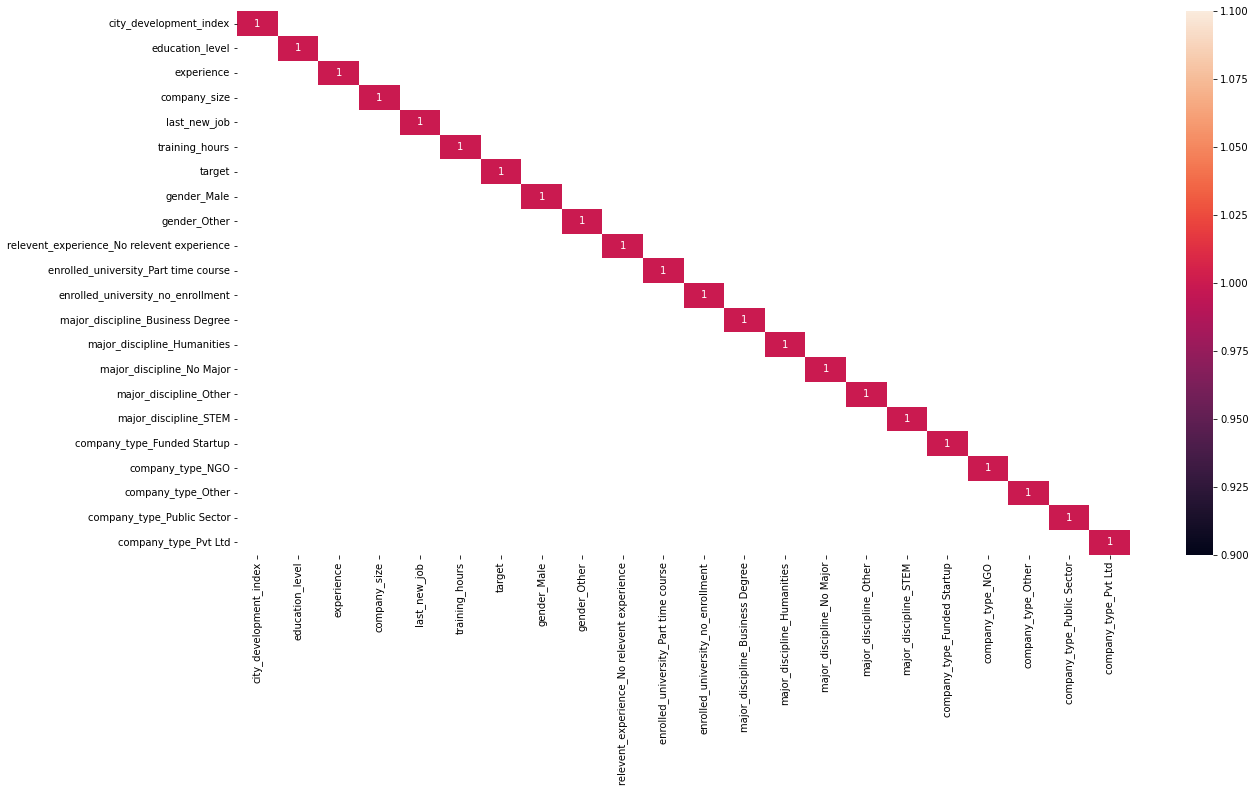

In [52]:
vcorr=df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(vcorr[(vcorr>0.80)|(vcorr <-80)],annot=True)

after balancing also there is no correlation between features.

## scaling the data


In [53]:
from sklearn.preprocessing import StandardScaler
for col in df1.columns:
    sc = StandardScaler()
    df1[col] = sc.fit_transform(df1[[col]])


In [54]:
df1.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.738311,-0.694771,1.217796,0.36024,-0.903440,-0.460937,1.726099,0.283951,-0.100017,-0.623293,-0.256147,0.589254,-0.131299,-0.190276,-0.109415,-0.142761,0.328174,-0.234591,-0.166634,-0.080148,-0.230384,0.447834
1,-0.429508,-0.694771,-1.052859,0.36024,1.163352,-0.200917,-0.579341,0.283951,-0.100017,1.604382,-0.256147,0.589254,-0.131299,-0.190276,-0.109415,-0.142761,0.328174,-0.234591,-0.166634,-0.080148,-0.230384,0.447834
2,-1.662207,-0.694771,0.309534,0.36024,1.680050,0.650059,-0.579341,0.283951,-0.100017,1.604382,-0.256147,-1.697061,-0.131299,-0.190276,-0.109415,-0.142761,0.328174,-0.234591,-0.166634,-0.080148,-0.230384,0.447834
3,-0.324080,-0.694771,1.066419,0.36024,1.680050,-0.082726,1.726099,0.283951,-0.100017,1.604382,-0.256147,0.589254,7.616199,-0.190276,-0.109415,-0.142761,-3.047167,-0.234591,-0.166634,-0.080148,-0.230384,0.447834
4,-0.502497,1.316181,1.217796,0.36024,0.646654,-1.122807,-0.579341,0.283951,-0.100017,-0.623293,-0.256147,0.589254,-0.131299,-0.190276,-0.109415,-0.142761,0.328174,4.262732,-0.166634,-0.080148,-0.230384,-2.232972


## Building the model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
## splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_balanced,y_balanced,test_size=.30,random_state=42)

## knn model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)

print(classification_report(y_test, y_pred_knnc))
print("Accuracy score of KNN : {:.2f}".format(accuracy_score(y_pred_knnc,y_test)))
print("Recall score of KNN: {:.2f}".format(recall_score(y_pred_knnc,y_test)))
print("Precision score of KNN: {:.2f}".format(precision_score(y_pred_knnc,y_test)))
print("F1 score of KNN: {:.2f}".format(f1_score(y_pred_knnc,y_test)))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      4050
         1.0       0.73      0.75      0.74      4115

    accuracy                           0.74      8165
   macro avg       0.74      0.74      0.74      8165
weighted avg       0.74      0.74      0.74      8165

Accuracy score of KNN : 0.74
Recall score of KNN: 0.73
Precision score of KNN: 0.75
F1 score of KNN: 0.74


## hyperparameter tuning of knn

In [58]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange(1, 31, 2), "metric": ["euclidean"]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
# returns the best model
grid_search_cv.best_estimator_
# the best parameters
grid_search_cv.best_params_
# results obtained by the best model
knn_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned KNN is: ', knn_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
The accuracy score with using the tuned KNN is:  0.7390941181966366


## Decisiontree model

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3, random_state=0)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
#metrics.accuracy_score(y_test, y_pred_dtc)

print(classification_report(y_test, y_pred_dtc))
print("Accuracy score of Decision tree : {:.2f}".format(accuracy_score(y_pred_dtc,y_test)))
print("Recall score of Decision tree: {:.2f}".format(recall_score(y_pred_dtc,y_test)))
print("Precision score of Decision tree: {:.2f}".format(precision_score(y_pred_dtc,y_test)))
print("F1 score of Decision tree: {:.2f}".format(f1_score(y_pred_dtc,y_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71      4050
         1.0       0.72      0.66      0.69      4115

    accuracy                           0.70      8165
   macro avg       0.70      0.70      0.70      8165
weighted avg       0.70      0.70      0.70      8165

Accuracy score of Decision tree : 0.70
Recall score of Decision tree: 0.72
Precision score of Decision tree: 0.66
F1 score of Decision tree: 0.69


## Hyperparamter tuning of decisiontreeclassifier

In [60]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
# returns the best model
grid_search_cv.best_estimator_
# the best parameters
grid_search_cv.best_params_
# results obtained by the best model
dt_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned decision tree classifier is: ', dt_accuracy)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
The accuracy score with using the tuned decision tree classifier is:  0.7658670946175828


## RandomForest model 

In [61]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

print(classification_report(y_test, y_pred_rfc))
print("Accuracy score of Random forest : {:.2f}".format(accuracy_score(y_pred_rfc,y_test)))
print("Recall score of Random forest : {:.2f}".format(recall_score(y_pred_rfc,y_test)))
print("Precision score of Random forest : {:.2f}".format(precision_score(y_pred_rfc,y_test)))
print("F1 score of Random forest : {:.2f}".format(f1_score(y_pred_rfc,y_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      4050
         1.0       0.80      0.80      0.80      4115

    accuracy                           0.80      8165
   macro avg       0.80      0.80      0.80      8165
weighted avg       0.80      0.80      0.80      8165

Accuracy score of Random forest : 0.80
Recall score of Random forest : 0.80
Precision score of Random forest : 0.80
F1 score of Random forest : 0.80


## Hyperparameter tuning of RandomForest model

In [62]:
params = {'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

grid_search_cv.best_estimator_
grid_search_cv.best_params_
rf_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned Random Forest is :',rf_accuracy)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
The accuracy score with using the tuned Random Forest is : 0.7431889536409934


## xgboost model

In [63]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgb_accuracy = accuracy_score(y_test,xgbc.predict(x_test))

print(classification_report(y_test, y_pred_xgbc))
print("Accuracy score of XGBclassifier : {:.2f}".format(accuracy_score(y_pred_xgbc,y_test)))
print("Recall score of XGBclassifier : {:.2f}".format(recall_score(y_pred_xgbc,y_test)))
print("Precision score of XGBclassifier : {:.2f}".format(precision_score(y_pred_xgbc,y_test)))
print("F1 score of XGBclassifier : {:.2f}".format(f1_score(y_pred_xgbc,y_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      4050
         1.0       0.83      0.83      0.83      4115

    accuracy                           0.83      8165
   macro avg       0.83      0.83      0.83      8165
weighted avg       0.83      0.83      0.83      8165

Accuracy score of XGBclassifier : 0.83
Recall score of XGBclassifier : 0.83
Precision score of XGBclassifier : 0.83
F1 score of XGBclassifier : 0.83


# THANK YOU 